# Old Code (including firms)

The old code up to the point where firms were removed.

This is all the code for the simulation of the market, including the traders, the asset and the market mechanism.

In [1]:
import numpy as np #import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import pymarket as pm
import math
import csv
import pprint
import icecream as ic
import networkx as nx

We start by initialising the trading asset, as well as 100 previous random prices so that traders have some material to make their initial trading decisions. These random prices will be kept constant throughout simulations so they don't affect the decisions of the traders between runs. The price at t=0 will be 100 so price movements during the simulation are normalised to an index.

,trading_price,volume,spread,true_price,10_MA,50_MA
-99,96.99,0,0,100,NaN,NaN
-98,97.27,0,0,100,NaN,NaN
-97,95.30,0,0,100,NaN,NaN
-96,95.18,0,0,100,NaN,NaN
-95,94.01,0,0,100,NaN,NaN
...,...,...,...,...,...,...
-4,99.31,0,0,100,99.84,99.09
-3,98.82,0,0,100,99.68,99.15
-2,100.64,0,0,100,99.65,99.26
-1,100.01,0,0,100,99.52,99.31


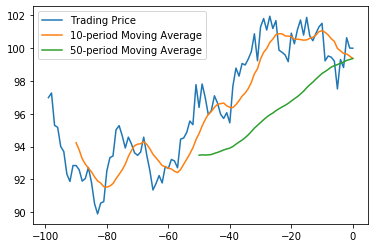

In [2]:
t = 100
period = []
start = -t+1

for i in range(t):
    period.append(start)
    start += 1
    
# asset_prices_rev = []
# price = 100

# for i in range(t):
    # asset_prices_rev.append(price)
    # price = price + np.random.normal(loc=-0.09, scale=1.0, size=None)
    
asset_prices_rev_final = [100, 100.01270443267846, 100.64019372161697, 98.81839318571531, 99.30899479777956, 97.51859080046586, 99.22427385535754, 99.44545557876086, 99.52622326159883, 99.23209122576705, 101.52132601414174, 101.30141646048006, 100.89710059388699, 100.46473999622577, 100.75961538456453, 101.88499554537094, 100.80411278857896, 101.72248034025961, 101.12565566539686, 100.26632483034365, 100.91562712976665, 99.17772539309188, 99.59066814732586, 99.75049301170291, 99.88257405096272, 101.67780729403768, 101.20291667999382, 101.94670634215417, 101.10767031065018, 101.81291988910793, 101.30365747376271, 99.2424041923615, 100.8833495441585, 99.78836505154021, 99.33535482264746, 98.97871646915819, 99.06522794959744, 98.30142009719744, 98.79170348115102, 97.6910991393464, 95.44595047877094, 96.06814982285735, 95.72056059028928, 95.98006873492281, 96.66174879041085, 97.10418900617363, 96.20190098646628, 95.95299800697686, 96.99590538116517, 97.81622741995606, 96.3887487724033, 97.77586186321399, 95.34063768966071, 95.55822196174113, 94.86914074199406, 94.52574130209447, 94.46441233699015, 92.7093912019743, 93.12968534010358, 93.2223145464527, 92.66989504822202, 92.78906639898042, 91.794571679981, 92.23728712947086, 91.7531808557108, 91.36069829889261, 92.5351177867759, 93.46525633285206, 94.57936577428167, 93.6743842774735, 93.47493406493045, 93.6252878884862, 94.17103159031704, 94.57988577655658, 93.92021148266691, 94.66830817347167, 95.2828076714649, 95.03199804355003, 93.43284668672827, 93.33299029582979, 92.51972813503856, 90.65244342293956, 90.55553325883402, 89.89860870807794, 90.5321278206722, 91.82820852517096, 92.73328391342815, 92.05545521924738, 91.89793090418809, 92.59268573869126, 92.84506087167615, 92.8490494107132, 91.88331933594272, 92.3255816844502, 93.70032141468926, 94.00839921394368, 95.17675414492784, 95.29954443407748, 97.27212940879878, 96.98808834932551]

asset_prices_rev_final.reverse()

asset_prices_rev_final_rounded = []

for i in asset_prices_rev_final:
    j = round(i, 2)
    asset_prices_rev_final_rounded.append(j)
    
asset_prices = asset_prices_rev_final_rounded
        
true_prices = []
    
for i in range(t):
    true_prices.append(100) #Assume true price unchanged in this period - remained 100
    
def evolve(assetdf): # Define the function that determines the evolution of the true asset price over time
    last_price = assetdf.iloc[-1]["trading_price"]
    base_price = last_price*(1 + (1.05**(1/100))) #The true price evolves to give a 5% return every 100 periods
    shock_p = np.random.randint(100, size=1) #There are some shocks to the true price, some large and some small
    shock = 0
    if shock_p < 5:
        shock = np.random.normal(loc=0, scale=5, size=None)
    elif shock_p > 5 and shock_p < 40:
        shock = np.random.normal(loc=0, scale=1, size=None)
    next_price = base_price + shock
    return next_price
    
def moving_average_list(price_list, window): #Define a function to calculate simple moving averages
    window_size = window
    price_series = pd.Series(price_list)
    windows = price_series.rolling(window_size)
    ma = round(windows.mean(), 2)
    ma_list = ma.tolist()
    return ma_list
    
mas = moving_average_list(asset_prices, 10) #Generate shorter moving average
mal = moving_average_list(asset_prices, 50) #Generate longer moving average

vol_list = []
spread_list = []
for i in range(100):
    vol_list.append(0)
    spread_list.append(0)

#assetdf = pd.DataFrame(data={"trading_price": asset_prices, "true_price": true_prices, "10_MA": mas, "50_MA": mal}, index=period)
assetdf = pd.DataFrame(data={"trading_price": asset_prices, "volume": vol_list, "spread": spread_list, "true_price": true_prices, "10_MA": mas, "50_MA": mal}, index=period)

plt.plot(period, asset_prices, label="Trading Price")
plt.plot(period, mas, label="10-period Moving Average")
plt.plot(period, mal, label="50-period Moving Average")
plt.legend()
assetdf

In the next cell we define the different flavours of traders and the syntax of how they receive information and place orders accordingly. Flavours include chartists ("chart"), fundamentalists/arbitrageurs ("arb"), value traders ("val") and noise traders ("noise"). The LSTM traders will be included later once a working market has been established.

Chartists represent the technical analysts of the world. They have 2 indicators (based solely on the previous prices of the asset) from which they base their expectations of market development. The indicators are moving averages which assess the trend of price-action (when the shorter period MA crosses the larger one that indicates a shift in trend). While the reliability of these indicators are empirically ambiguous in academic circles, they are widely used across technical analysts in the retail trading community.

Fundamentalists exist to constantly provide pressure towards the "true" price of the asset. They will act as arbitrageurs to push the price towards the true price of the asset. The further away price deviates from the "true" price, the higher the order size grows as they believe the asset is truly under/overvalued. For the purposes of simplicity, a true price will be given exogenously, and will evolve linearly with some random shocks. Value traders are those that believe "time in the market beats timing the market" and will buy and hold the asset over time. They expect to make their returns over the long term based on the true price of the asset growing (and the trading price reflecting this).

Noise traders have no specific strategy and simply buy and sell at random to provide volume in the market. The real world equivalent for this could be considered to be uninformed retail traders.

Traders are also split between firm and retail. Firms have a higher starting balance (to represent higher market power) and also have better quality information, e.g. the arbitraging firms have a smaller margin of error when estimating the true asset price compared to arbitraging retail traders.

In [3]:
def w(p): # Define the probability weighting function (prospect theory) for the utility of the traders
    g = 0.5 # G for gamma (0.5 taken from empirical studies)
    return (p**g)/((p**g+(1-p)**g)**(1/g))

#def v(x): #Define the value function (prospect theory) for the utility of the traders
#    a = 0.44 # a for alpha (all parameter values have been taken from empirical studies)
#    b = 0.49 # b for beta
#    l = 1.06 # l for lambda
#    if x >= 0:
#        v = x**a
#    elif x < 0:
#        v = -l(-x)**b
#    return v

def sigmoid(x): #Used to transform inputs in range (-inf,inf) to (0,1) for probabilities
    return 1/(1 + math.exp(-x))

class Trader:
    
    def v(self, x): #Define the value function (prospect theory) for the utility of the traders
        self.x = x
#        self.val = 0
        self.a = 0.44 # a for alpha (all parameter values have been taken from empirical studies)
        self.b = 0.49 # b for beta
        self.l = 1.06 # l for lambda
        if self.x >= 0:
            self.val = self.x**self.a
        elif self.x < 0:
            self.val = -l(-self.x)**self.b
        return self.val
                
    idcount = 0
        
    def __init__(self, flavour, firm, ID):
        self.firm = firm 
        self.flavour = flavour     
        self.activ = np.random.uniform() #Activation frequency of each trader
        if firm:
            self.bal = 500_000
            self.stock = 5000
            self.tp_error = np.random.normal(loc=0, scale=0.75, size=None)
            self.scale = np.random.uniform(low=100, high=200)
        else:
            self.bal = 5_000
            self.tp_error = np.random.normal(loc=0, scale=1.5, size=None)
            self.stock = 50
            self.scale = np.random.uniform(low=1, high=2) #The scale by which order sizes are increased above utility
        self.acc = self.stock*100 + self.bal # Account size equals value of stock + value of cash balance            
#        trader.idcount += 1
        self.id = "id" + str(ID)
#        self.id = id(self)
        self.faith = np.random.uniform() #The proclivity of the agent to stick to its current trading strategy
        self.back = round(10*self.faith)
        self.val = 0
        
    def placebid(self): #Bid needs to be made in the form bid = (quantity, price, userID, isBuying=True)
        if self.flavour == "chart":
            r1 = (assetdf.iloc[-1]["trading_price"]-assetdf.iloc[-2]["trading_price"])/(assetdf.iloc[-2]["trading_price"])
            r2 = (assetdf.iloc[-2]["trading_price"]-assetdf.iloc[-3]["trading_price"])/(assetdf.iloc[-3]["trading_price"])
            r3 = (assetdf.iloc[-3]["trading_price"]-assetdf.iloc[-4]["trading_price"])/(assetdf.iloc[-4]["trading_price"])
            r = (r1 + r2 + r3)/3
            self.bidprice = round(assetdf.iloc[-1]["trading_price"]*(1+r), 2)
            self.quantity = round(self.util*self.scale)
        
        elif self.flavour == "arb":
            self.bidprice = round(assetdf.iloc[-1]["trading_price"], 2)
            self.quantity = round(self.util*self.scale)
#            print(self.scale)
            
        elif self.flavour == "val":
            self.bidprice = round(assetdf.iloc[-1]["trading_price"], 2)
            self.quantity = round((self.acc/self.bidprice)/100)
            
        elif self.flavour == "noise":
            self.bidprice = round(np.random.normal(loc=(assetdf.iloc[-1]["trading_price"]), scale = 0.75, size = None), 2)
            self.quantity = abs(round(np.random.normal(loc=(self.stock/100), scale=3, size=None)))
        
        if self.quantity*self.bidprice > self.bal:
            self.quantity = math.floor(self.bal/self.bidprice)
        if self.quantity == 0:
            self.quantity = 1
        self.bid = (self.quantity, self.bidprice, self.id, True)
        return self.bid
        
    def placeask(self): #Same form as bids but with isBuying=False
        if self.flavour == "chart":
            r1 = (assetdf.iloc[-1]["trading_price"]-assetdf.iloc[-2]["trading_price"])/(assetdf.iloc[-2]["trading_price"])
            r2 = (assetdf.iloc[-2]["trading_price"]-assetdf.iloc[-3]["trading_price"])/(assetdf.iloc[-3]["trading_price"])
            r3 = (assetdf.iloc[-3]["trading_price"]-assetdf.iloc[-4]["trading_price"])/(assetdf.iloc[-4]["trading_price"])
            r = (r1 + r2 + r3)/3
            self.askprice = round(assetdf.iloc[-1]["trading_price"]*(1+r), 2)
            self.quantity = round(self.util*self.scale)
            
        elif self.flavour == "arb":
            self.askprice = round(assetdf.iloc[-1]["trading_price"], 2)
            self.quantity = round(self.util*self.scale)
            
        elif self.flavour == "val":
            self.askprice = round(assetdf.iloc[-1]["trading_price"], 2)
            self.quantity = round(self.stock/2)
            
        elif self.flavour == "noise":
            self.askprice = round(np.random.normal(loc=(assetdf.iloc[-1]["trading_price"]), scale = 0.75, size = None), 2)
            self.quantity = abs(round(np.random.normal(loc=(self.stock/100), scale=3, size=None)))
            
        if self.quantity > self.stock:
            self.quantity = self.stock
        if self.quantity == 0:
            self.quantity = 1
        self.ask = (self.quantity, self.askprice, self.id, False)
        return self.ask
                        
    def trade(self):
        if self.flavour == "chart":
            if assetdf.iloc[-1]["10_MA"] > assetdf.iloc[-1]["50_MA"]:
                self.xgood = assetdf["trading_price"].max() - assetdf.iloc[-1]["trading_price"]
                self.xbad = assetdf.iloc[-1]["50_MA"] - assetdf.iloc[-1]["trading_price"]
                self.pgood = sigmoid(100*((assetdf.iloc[-1]["trading_price"]-assetdf.iloc[-(1+self.back)]["trading_price"])/assetdf.iloc[-(1+self.back)]["trading_price"]))
                self.pbad = 1 - self.pgood
                self.lot = self.xgood*w(self.pgood) + self.xbad*w(self.pbad)
                self.util = self.v(self.lot)
                if self.util > 0.5:
                    return self.placebid()
            elif assetdf.iloc[-1]["10_MA"] < assetdf.iloc[-1]["50_MA"]:
                self.xgood = assetdf.iloc[-1]["trading_price"] - assetdf["trading_price"].min()
                self.xbad = assetdf.iloc[-1]["trading_price"] - assetdf.iloc[-1]["50_MA"]
                self.pgood = sigmoid(-100*((assetdf.iloc[-1]["trading_price"]-assetdf.iloc[-(1+self.back)]["trading_price"])/assetdf.iloc[-(1+self.back)]["trading_price"]))
                self.pbad = 1 - self.pgood
                self.lot = self.xgood*w(self.pgood) + self.xbad*w(self.pbad)
                self.util = self.v(self.lot)
                if self.util > 0.5:
                    return self.placeask()
            
        elif self.flavour == "arb":
            if assetdf.iloc[-1]["trading_price"] < assetdf.iloc[-1]["true_price"] + self.tp_error:
                self.xgood = assetdf.iloc[-1]["true_price"] + self.tp_error - assetdf.iloc[-1]["trading_price"]
                self.xbad = assetdf.iloc[-1]["trading_price"] - assetdf["trading_price"].min()
                self.pgood = (assetdf.iloc[-1]["true_price"] + self.tp_error - assetdf.iloc[-1]["trading_price"])/(assetdf.iloc[-1]["true_price"] + self.tp_error - assetdf["trading_price"].min())
                self.pbad = 1 - self.pgood
                self.lot = self.xgood*w(self.pgood) + self.xbad*w(self.pbad)
#                print(self.lot)
                self.util = self.v(self.lot)
#                print("util = " + str(self.util))
                if self.util > 0.5:
                    return self.placebid()
            elif assetdf.iloc[-1]["trading_price"] > assetdf.iloc[-1]["true_price"] + self.tp_error:
                self.xgood = assetdf.iloc[-1]["trading_price"] - assetdf.iloc[-1]["true_price"] + self.tp_error
                self.xbad = assetdf.iloc[-1]["trading_price"] - assetdf["trading_price"].max()
                self.pgood = (assetdf.iloc[-1]["trading_price"] - assetdf.iloc[-1]["true_price"] + self.tp_error)/(assetdf["trading_price"].max() - assetdf.iloc[-1]["true_price"] + self.tp_error)
                self.lot = self.xgood*w(self.pgood) + self.xbad*w(self.xbad)
                self.util = self.v(self.lot)
#                print("util = " + str(self.util))
                if self.util > 0.5:
                    return self.placeask()

        elif self.flavour == "val":
            if self.activ > activ_rate:
                if assetdf.iloc[-1]["trading_price"] >= assetdf["trading_price"].max():
                    return self.placeask()
                else:
                    return self.placebid()
            else:
                pass
                    
        elif self.flavour == "noise":
            if self.activ > activ_rate:
                x = np.random.normal(loc=0, scale = 1, size = None)
                if x > 0:
                    return self.placebid()
                if x < 0:
                    return self.placeask()
            else:
                pass

Next we set up the environment for the market. The market will use a simple peer-to-peer exchange mechanism, where the orders are ranked from highest to least price and then matched as best as possible. Aggressive bids/asks are more likely to secure the desired trade volume but come at a cost of giving up more potential surplus (NB: currently unfinished).

In [4]:
#for i in range(100):
#    exec(f't_{i} = trader(FLAVOUR, FIRM)')

#Run the market over a set number of periods and capture the trading results from it.

#for i in range(1):
#    for i in traders:
#        self.trade() # traders place bids
#    mar.run("uniform") # market runs and orders get filled
    # update accounts for each trader
    # record trading price (and other statistics) and generate period's true price
    # traders update beliefs about future and change flavours (if applicable)

In [5]:
traders_set = []
id_dict = {}

t1 = Trader("arb", True, 1)
t2 = Trader("arb", True, 2)
t3 = Trader("arb", True, 3)
t4 = Trader("arb", False, 4)
t5 = Trader("arb", False, 5)
t6 = Trader("arb", False, 6)
t7 = Trader("arb", False, 7)
t8 = Trader("arb", False, 8)
t9 = Trader("arb", False, 9)
t10 = Trader("arb", False, 10)
t11 = Trader("arb", False, 11)
t12 = Trader("arb", False, 12)
t13 = Trader("arb", False, 13)
t14 = Trader("arb", False, 14)
t15 = Trader("arb", False, 15)
t16 = Trader("arb", False, 16)
t17 = Trader("arb", False, 17)
t18 = Trader("arb", False, 18)
t19 = Trader("arb", False, 19)
t20 = Trader("arb", False, 20)
t21 = Trader("arb", False, 21)
t22 = Trader("arb", False, 22)
t23 = Trader("arb", False, 23)
t24 = Trader("arb", False, 24)
t25 = Trader("arb", False, 25)
t26 = Trader("chart", True, 26)
t27 = Trader("chart", True, 27)
t28 = Trader("chart", True, 28)
t29 = Trader("chart", False, 29)
t30 = Trader("chart", False, 30)
t31 = Trader("chart", False, 31)
t32 = Trader("chart", False, 32)
t33 = Trader("chart", False, 33)
t34 = Trader("chart", False, 34)
t35 = Trader("chart", False, 35)
t36 = Trader("chart", False, 36)
t37 = Trader("chart", False, 37)
t38 = Trader("chart", False, 38)
t39 = Trader("chart", False, 39)
t40 = Trader("chart", False, 40)
t41 = Trader("chart", False, 41)
t42 = Trader("chart", False, 42)
t43 = Trader("chart", False, 43)
t44 = Trader("chart", False, 44)
t45 = Trader("chart", False, 45)
t46 = Trader("chart", False, 46)
t47 = Trader("chart", False, 47)
t48 = Trader("chart", False, 48)
t49 = Trader("chart", False, 49)
t50 = Trader("chart", False, 50)
t51 = Trader("val", True, 51)
t52 = Trader("val", True, 52)
t53 = Trader("val", False, 53)
t54 = Trader("val", False, 54)
t55 = Trader("val", False, 55)
t56 = Trader("val", False, 56)
t57 = Trader("val", False, 57)
t58 = Trader("val", False, 58)
t59 = Trader("val", False, 59)
t60 = Trader("val", False, 60)
t61 = Trader("val", False, 61)
t62 = Trader("val", False, 62)
t63 = Trader("val", False, 63)
t64 = Trader("val", False, 64)
t65 = Trader("val", False, 65)
t66 = Trader("val", False, 66)
t67 = Trader("val", False, 67)
t68 = Trader("val", False, 68)
t69 = Trader("val", False, 69)
t70 = Trader("val", False, 70)
t71 = Trader("val", False, 71)
t72 = Trader("val", False, 72)
t73 = Trader("val", False, 73)
t74 = Trader("val", False, 74)
t75 = Trader("val", False, 75)
t76 = Trader("noise", True, 76)
t77 = Trader("noise", True, 77)
t78 = Trader("noise", False, 78)
t79 = Trader("noise", False, 79)
t80 = Trader("noise", False, 80)
t81 = Trader("noise", False, 81)
t82 = Trader("noise", False, 82)
t83 = Trader("noise", False, 83)
t84 = Trader("noise", False, 84)
t85 = Trader("noise", False, 85)
t86 = Trader("noise", False, 86)
t87 = Trader("noise", False, 87)
t88 = Trader("noise", False, 88)
t89 = Trader("noise", False, 89)
t90 = Trader("noise", False, 90)
t91 = Trader("noise", False, 91)
t92 = Trader("noise", False, 92)
t93 = Trader("noise", False, 93)
t94 = Trader("noise", False, 94)
t95 = Trader("noise", False, 95)
t96 = Trader("noise", False, 96)
t97 = Trader("noise", False, 97)
t98 = Trader("noise", False, 98)
t99 = Trader("noise", False, 99)
t100 = Trader("noise", False, 100)
traders_set.append(t1)
traders_set.append(t2)
traders_set.append(t3)
traders_set.append(t4)
traders_set.append(t5)
traders_set.append(t6)
traders_set.append(t7)
traders_set.append(t8)
traders_set.append(t9)
traders_set.append(t10)
traders_set.append(t11)
traders_set.append(t12)
traders_set.append(t13)
traders_set.append(t14)
traders_set.append(t15)
traders_set.append(t16)
traders_set.append(t17)
traders_set.append(t18)
traders_set.append(t19)
traders_set.append(t20)
traders_set.append(t21)
traders_set.append(t22)
traders_set.append(t23)
traders_set.append(t24)
traders_set.append(t25)
traders_set.append(t26)
traders_set.append(t27)
traders_set.append(t28)
traders_set.append(t29)
traders_set.append(t30)
traders_set.append(t31)
traders_set.append(t32)
traders_set.append(t33)
traders_set.append(t34)
traders_set.append(t35)
traders_set.append(t36)
traders_set.append(t37)
traders_set.append(t38)
traders_set.append(t39)
traders_set.append(t40)
traders_set.append(t41)
traders_set.append(t42)
traders_set.append(t43)
traders_set.append(t44)
traders_set.append(t45)
traders_set.append(t46)
traders_set.append(t47)
traders_set.append(t48)
traders_set.append(t49)
traders_set.append(t50)
traders_set.append(t51)
traders_set.append(t52)
traders_set.append(t53)
traders_set.append(t54)
traders_set.append(t55)
traders_set.append(t56)
traders_set.append(t57)
traders_set.append(t58)
traders_set.append(t59)
traders_set.append(t60)
traders_set.append(t61)
traders_set.append(t62)
traders_set.append(t63)
traders_set.append(t64)
traders_set.append(t65)
traders_set.append(t66)
traders_set.append(t67)
traders_set.append(t68)
traders_set.append(t69)
traders_set.append(t70)
traders_set.append(t71)
traders_set.append(t72)
traders_set.append(t73)
traders_set.append(t74)
traders_set.append(t75)
traders_set.append(t76)
traders_set.append(t77)
traders_set.append(t78)
traders_set.append(t79)
traders_set.append(t80)
traders_set.append(t81)
traders_set.append(t82)
traders_set.append(t83)
traders_set.append(t84)
traders_set.append(t85)
traders_set.append(t86)
traders_set.append(t87)
traders_set.append(t88)
traders_set.append(t89)
traders_set.append(t90)
traders_set.append(t91)
traders_set.append(t92)
traders_set.append(t93)
traders_set.append(t94)
traders_set.append(t95)
traders_set.append(t96)
traders_set.append(t97)
traders_set.append(t98)
traders_set.append(t99)
traders_set.append(t100)

for participant in traders_set:
    id_dict[participant.id] = participant

In [6]:
bids = []
asks = []
activ_rate = np.random.uniform()
for participant in traders_set:
    order = participant.trade()
    if type(order) == tuple and order[3] == True:
        bids.append(order)
    if type(order) == tuple and order[3] == False:
        asks.append(order)

/Users/karangarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
def run_market(bids, asks, iddict, traders_set):
    bidsdf = pd.DataFrame(bids, columns=["q", "p", "id", "buy"])
    asksdf = pd.DataFrame(asks, columns=["q", "p", "id", "buy"])
    bidsdf = bidsdf.drop(columns=["buy"])
    asksdf = asksdf.drop(columns=["buy"])
    bidsdf = bidsdf.sort_values(by=["p", "q"], ascending=False)
    asksdf = asksdf.sort_values(by=["p", "q"], ascending=False)
    bidsdf = bidsdf.reset_index(drop=True)
    asksdf = asksdf.reset_index(drop=True)
    bal_data = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc]
        bal_data.append(row)
    tradersdf1 = pd.DataFrame(data=bal_data, columns=["id", "stock", "bal", "acc"])
#    print(tradersdf1)

    traded_val = []
    volume = 0
    spread = round(bidsdf.iloc[0]["p"] - asksdf.iloc[-1]["p"], 2)
    
#    print(bidsdf)
#    print(asksdf)
    
    while len(bidsdf) !=0 and len(asksdf) !=0:
        buyer_id = bidsdf.iloc[0]["id"]
        seller_id = asksdf.iloc[0]["id"]
        if bidsdf.iloc[0]["p"] == asksdf.iloc[0]["p"]:
            price = round(bidsdf.iloc[0]["p"], 2)
        else:
            price = round((bidsdf.iloc[0]["p"] + asksdf.iloc[0]["p"])/2, 2)
        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            quantity = asksdf.iloc[0]["q"]

        iddict[str(buyer_id)].stock += quantity
        iddict[str(seller_id)].stock -= quantity
        iddict[str(buyer_id)].bal -= price*quantity
        iddict[str(seller_id)].bal += price*quantity
        volume += quantity
        traded_val.append(price*quantity)

        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            bidsdf = bidsdf.drop(bidsdf.index[0])
            asksdf = asksdf.drop(asksdf.index[0])
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            asksdf.at[0, "q"] = asksdf.iloc[0]["q"] - bidsdf.iloc[0]["q"]
            bidsdf = bidsdf.drop(bidsdf.index[0])
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            bidsdf.at[0, "q"] = bidsdf.iloc[0]["q"] - asksdf.iloc[0]["q"]
            asksdf = asksdf.drop(asksdf.index[0])
        bidsdf = bidsdf.reset_index(drop=True)
        asksdf = asksdf.reset_index(drop=True)
        #print("ROUND COMPLETE, trade price = " + str(price) +", quantity = " + str(quantity))
        #print(bidsdf)
        #print(asksdf)

    total = sum(traded_val)
    avg_price = round((total/volume), 2)
    print(bidsdf)
    print(asksdf)
    
    for participant in traders_set:
        participant.acc = participant.bal + (participant.stock*avg_price)
    
    bal_data_new = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc]
        bal_data_new.append(row)
    tradersdf2 = pd.DataFrame(data=bal_data_new, columns=["id", "stock", "bal", "acc"])
    return {"trading_price": avg_price, "volume": volume, "spread": spread}, tradersdf1, tradersdf2

In [8]:
"""UPDATED VERSION INCLUDING PRICE MECHANISM"""

def run_market(bids, asks, iddict, traders_set):
    bidsdf = pd.DataFrame(bids, columns=["q", "p", "id", "buy"])
    asksdf = pd.DataFrame(asks, columns=["q", "p", "id", "buy"])
    bidsdf = bidsdf.drop(columns=["buy"])
    asksdf = asksdf.drop(columns=["buy"])
    bidsdf = bidsdf.sort_values(by=["p", "q"], ascending=False)
    asksdf = asksdf.sort_values(by=["p", "q"], ascending=False)
    bidsdf = bidsdf.reset_index(drop=True)
    asksdf = asksdf.reset_index(drop=True)
    bal_data = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc]
        bal_data.append(row)
    tradersdf1 = pd.DataFrame(data=bal_data, columns=["id", "stock", "bal", "acc"])
#    print(tradersdf1)

    asksdfrev = asksdf.sort_values(by=["p", "q"], ascending=True)
    asksdfrev = asksdfrev.reset_index(drop=True)

    demandq = []
    demandp = []
    supplyq = []
    supplyp = []
    
    demandqtemp = 0
    for i in range(len(bidsdf)):
        if i == len(bidsdf)-1:
            if bidsdf.iloc[i]["p"] == bidsdf.iloc[i-1]["p"]:
                demandqtemp += bidsdf.iloc[i]["q"]
                demandq.append(demandqtemp)
                demandp.append(bidsdf.iloc[i]["p"])
                demandqtemp = 0
                break
            elif bidsdf.iloc[i]["p"] < bidsdf.iloc[i-1]["p"]:
                demandqtemp += bidsdf.iloc[i]["q"]
                demandq.append(demandqtemp)
                demandp.append(bidsdf.iloc[i]["p"])
                demandqtemp = 0
                break
        if bidsdf.iloc[i]["p"] == bidsdf.iloc[i+1]["p"]:
            demandqtemp += bidsdf.iloc[i]["q"]
        elif bidsdf.iloc[i]["p"] > bidsdf.iloc[i+1]["p"]:
            demandqtemp += bidsdf.iloc[i]["q"]
            demandq.append(demandqtemp)
            demandp.append(bidsdf.iloc[i]["p"])
            demandqtemp = 0
    for i in range(len(demandq)):
        if i !=0:
            demandq[i] += demandq[i-1]
    
    supplyqtemp = 0
    for i in range(len(asksdfrev)):
        if i == len(asksdfrev)-1:
            if asksdfrev.iloc[i]["p"] == asksdfrev.iloc[i-1]["p"]:
                supplyqtemp += asksdfrev.iloc[i]["q"]
                supplyq.append(supplyqtemp)
                supplyp.append(asksdfrev.iloc[i]["p"])
                supplyqtemp = 0
                break
            elif asksdfrev.iloc[i]["p"] > asksdfrev.iloc[i-1]["p"]:
                supplyqtemp += asksdfrev.iloc[i]["q"]
                supplyq.append(supplyqtemp)
                supplyp.append(asksdfrev.iloc[i]["p"])
                supplyqtemp = 0  
                break
        if asksdfrev.iloc[i]["p"] == asksdfrev.iloc[i+1]["p"]:
            supplyqtemp += asksdfrev.iloc[i]["q"]
        elif asksdfrev.iloc[i]["p"] < asksdfrev.iloc[i+1]["p"]:
            supplyqtemp += asksdfrev.iloc[i]["q"]
            supplyq.append(supplyqtemp)
            supplyp.append(asksdfrev.iloc[i]["p"])
            supplyqtemp = 0
    for i in range(len(supplyq)):
        if i !=0:
            supplyq[i] += supplyq[i-1]

    plt.step(demandq, demandp)
    plt.step(supplyq, supplyp)

    traded_val = []
    volume = 0
    spread = round(bidsdf.iloc[0]["p"] - asksdf.iloc[-1]["p"], 2)
    
#    print(bidsdf)
#    print(asksdf)
    
    while len(bidsdf) !=0 and len(asksdf) !=0:
        buyer_id = bidsdf.iloc[0]["id"]
        seller_id = asksdf.iloc[0]["id"]
        if bidsdf.iloc[0]["p"] == asksdf.iloc[0]["p"]:
            price = round(bidsdf.iloc[0]["p"], 2)
        else:
            price = round((bidsdf.iloc[0]["p"] + asksdf.iloc[0]["p"])/2, 2)
        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            quantity = asksdf.iloc[0]["q"]

        iddict[str(buyer_id)].stock += quantity
        iddict[str(seller_id)].stock -= quantity
        iddict[str(buyer_id)].bal -= price*quantity
        iddict[str(seller_id)].bal += price*quantity
        volume += quantity
        traded_val.append(price*quantity)

        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            bidsdf = bidsdf.drop(bidsdf.index[0])
            asksdf = asksdf.drop(asksdf.index[0])
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            asksdf.at[0, "q"] = asksdf.iloc[0]["q"] - bidsdf.iloc[0]["q"]
            bidsdf = bidsdf.drop(bidsdf.index[0])
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            bidsdf.at[0, "q"] = bidsdf.iloc[0]["q"] - asksdf.iloc[0]["q"]
            asksdf = asksdf.drop(asksdf.index[0])
        bidsdf = bidsdf.reset_index(drop=True)
        asksdf = asksdf.reset_index(drop=True)
        #print("ROUND COMPLETE, trade price = " + str(price) +", quantity = " + str(quantity))
        #print(bidsdf)
        #print(asksdf)

    total = sum(traded_val)
    avg_price = round((total/volume), 2)
    print(bidsdf)
    print(asksdf)
    
    for participant in traders_set:
        participant.acc = participant.bal + (participant.stock*avg_price)
    
    bal_data_new = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc]
        bal_data_new.append(row)
    tradersdf2 = pd.DataFrame(data=bal_data_new, columns=["id", "stock", "bal", "acc"])
    return {"trading_price": avg_price, "volume": volume, "spread": spread}, tradersdf1, tradersdf2

In [9]:
"""MOST UP TO DATE VERSION"""
def run_market(bids, asks, iddict, traders_set):
    bidsdf = pd.DataFrame(bids, columns=["q", "p", "id", "buy"])
    asksdf = pd.DataFrame(asks, columns=["q", "p", "id", "buy"])
    bidsdf = bidsdf.drop(columns=["buy"])
    asksdf = asksdf.drop(columns=["buy"])
    bidsdf = bidsdf.sort_values(by=["p", "q"], ascending=False)
    asksdf = asksdf.sort_values(by=["p", "q"], ascending=False)
    bidsdf = bidsdf.reset_index(drop=True)
    asksdf = asksdf.reset_index(drop=True)
    bal_data = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc, participant.flavour, participant.firm]
        bal_data.append(row)
    tradersdf1 = pd.DataFrame(data=bal_data, columns=["id", "stock", "bal", "acc", "flavour", "firm"])
#    print(tradersdf1)

    traded_val = []
    volume = 0
    spread = round(bidsdf.iloc[0]["p"] - asksdf.iloc[-1]["p"], 2)

#    print(bidsdf)
#    print(asksdf)

    while len(bidsdf) !=0 and len(asksdf) !=0:
        buyer_id = bidsdf.iloc[0]["id"]
        seller_id = asksdf.iloc[0]["id"]
        if bidsdf.iloc[0]["p"] == asksdf.iloc[0]["p"]:
            price = round(bidsdf.iloc[0]["p"], 2)
        else:
            price = round((bidsdf.iloc[0]["p"] + asksdf.iloc[0]["p"])/2, 2)
        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            quantity = asksdf.iloc[0]["q"]

        iddict[str(buyer_id)].stock += quantity
        iddict[str(seller_id)].stock -= quantity
        iddict[str(buyer_id)].bal -= price*quantity
        iddict[str(seller_id)].bal += price*quantity
        volume += quantity
        traded_val.append(price*quantity)

        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            bidsdf = bidsdf.drop(bidsdf.index[0])
            asksdf = asksdf.drop(asksdf.index[0])
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            asksdf.at[0, "q"] = asksdf.iloc[0]["q"] - bidsdf.iloc[0]["q"]
            bidsdf = bidsdf.drop(bidsdf.index[0])
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            bidsdf.at[0, "q"] = bidsdf.iloc[0]["q"] - asksdf.iloc[0]["q"]
            asksdf = asksdf.drop(asksdf.index[0])
        bidsdf = bidsdf.reset_index(drop=True)
        asksdf = asksdf.reset_index(drop=True)
        #print("ROUND COMPLETE, trade price = " + str(price) +", quantity = " + str(quantity))
        #print(bidsdf)
        #print(asksdf)

    total = sum(traded_val)
    avg_price = round((total/volume), 2)
    print(bidsdf)
    print(asksdf)

    for participant in traders_set:
        participant.acc = participant.bal + (participant.stock*avg_price)

    bal_data_new = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc, participant.flavour, participant.firm]
        bal_data_new.append(row)
    tradersdf2 = pd.DataFrame(data=bal_data_new, columns=["id", "stock", "bal", "acc", "flavour", "firm"])
    return {"trading_price": avg_price, "volume": volume, "spread": spread}, tradersdf1, tradersdf2

In [10]:
period1, state0, state1 = run_market(bids, asks, id_dict, traders_set)

Empty DataFrame
Columns: [q, p, id]
Index: []
       q       p    id
0   28.0  100.40  id26
1    4.0  100.40  id41
2    3.0  100.40  id29
3    3.0  100.40  id31
4    3.0  100.40  id32
5    3.0  100.40  id33
6    3.0  100.40  id34
7    3.0  100.40  id36
8    3.0  100.40  id39
9    3.0  100.40  id40
10   3.0  100.40  id42
11   3.0  100.40  id46
12   3.0  100.40  id47
13   3.0  100.40  id48
14   2.0  100.40  id30
15   2.0  100.40  id35
16   2.0  100.40  id37
17   2.0  100.40  id38
18   2.0  100.40  id43
19   2.0  100.40  id44
20   2.0  100.40  id45
21   2.0  100.40  id49
22   2.0  100.40  id50
23   1.0  100.37  id88


In [11]:
print(period1)
print(state0)
print(state1)

{'trading_price': 100.21, 'volume': 807.0, 'spread': 0.68}
       id  stock     bal      acc flavour   firm
0     id1   5000  500000  1000000     arb   True
1     id2   5000  500000  1000000     arb   True
2     id3   5000  500000  1000000     arb   True
3     id4     50    5000    10000     arb  False
4     id5     50    5000    10000     arb  False
..    ...    ...     ...      ...     ...    ...
95   id96     50    5000    10000   noise  False
96   id97     50    5000    10000   noise  False
97   id98     50    5000    10000   noise  False
98   id99     50    5000    10000   noise  False
99  id100     50    5000    10000   noise  False

[100 rows x 6 columns]
       id   stock        bal         acc flavour   firm
0     id1  5000.0  500000.00  1001050.00     arb   True
1     id2  5462.0  453701.23  1001048.25     arb   True
2     id3  5295.0  470441.00  1001052.95     arb   True
3     id4    50.0    5000.00    10010.50     arb  False
4     id5    50.0    5000.00    10010.50     arb 

In [12]:
""" Plotting supply and demand curves"""
asksdfrev = asksdf.sort_values(by=["p", "q"], ascending=True)
asksdfrev = asksdfrev.reset_index(drop=True)

demandq = []
demandp = []
supplyq = []
supplyp = []
    
demandqtemp = 0
for i in range(len(bidsdf)):
    if i == len(bidsdf)-1:
        if bidsdf.iloc[i]["p"] == bidsdf.iloc[i-1]["p"]:
            demandqtemp += bidsdf.iloc[i]["q"]
            demandq.append(demandqtemp)
            demandp.append(bidsdf.iloc[i]["p"])
            demandqtemp = 0
            break
        elif bidsdf.iloc[i]["p"] < bidsdf.iloc[i-1]["p"]:
            demandqtemp += bidsdf.iloc[i]["q"]
            demandq.append(demandqtemp)
            demandp.append(bidsdf.iloc[i]["p"])
            demandqtemp = 0
            break
    if bidsdf.iloc[i]["p"] == bidsdf.iloc[i+1]["p"]:
        demandqtemp += bidsdf.iloc[i]["q"]
        print("abc")
    elif bidsdf.iloc[i]["p"] > bidsdf.iloc[i+1]["p"]:
        demandqtemp += bidsdf.iloc[i]["q"]
        demandq.append(demandqtemp)
        demandp.append(bidsdf.iloc[i]["p"])
        demandqtemp = 0
        print("123")
for i in range(len(demandq)):
    if i !=0:
        demandq[i] += demandq[i-1]
    
supplyqtemp = 0
for i in range(len(asksdfrev)):
    if i == len(asksdfrev)-1:
        if asksdfrev.iloc[i]["p"] == asksdfrev.iloc[i-1]["p"]:
            supplyqtemp += asksdfrev.iloc[i]["q"]
            supplyq.append(supplyqtemp)
            supplyp.append(asksdfrev.iloc[i]["p"])
            supplyqtemp = 0
            break
        elif asksdfrev.iloc[i]["p"] > asksdfrev.iloc[i-1]["p"]:
            supplyqtemp += asksdfrev.iloc[i]["q"]
            supplyq.append(supplyqtemp)
            supplyp.append(asksdfrev.iloc[i]["p"])
            supplyqtemp = 0  
            break
    if asksdfrev.iloc[i]["p"] == asksdfrev.iloc[i+1]["p"]:
        supplyqtemp += asksdfrev.iloc[i]["q"]
    elif asksdfrev.iloc[i]["p"] < asksdfrev.iloc[i+1]["p"]:
        supplyqtemp += asksdfrev.iloc[i]["q"]
        supplyq.append(supplyqtemp)
        supplyp.append(asksdfrev.iloc[i]["p"])
        supplyqtemp = 0
for i in range(len(supplyq)):
    if i !=0:
        supplyq[i] += supplyq[i-1]
    
#print(demandq)
#print(demandp)
#print(supplyq)
#print(supplyp)

#plt.step(demandq, demandp)
#plt.step(supplyq, supplyp)

NameError: name 'asksdf' is not defined

In [13]:
"""CHANGES MADE IN GRID"""
def run_market(bids, asks, iddict, traders_set):
    bidsdf = pd.DataFrame(bids, columns=["q", "p", "id", "buy"])
    asksdf = pd.DataFrame(asks, columns=["q", "p", "id", "buy"])
    bidsdf = bidsdf.drop(columns=["buy"])
    asksdf = asksdf.drop(columns=["buy"])
    bidsdf = bidsdf.sort_values(by=["p", "q"], ascending=False)
    asksdf = asksdf.sort_values(by=["p", "q"], ascending=False)
    bidsdf = bidsdf.reset_index(drop=True)
    asksdf = asksdf.reset_index(drop=True)
    bal_data = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc, participant.flavour, participant.firm]
        bal_data.append(row)
    tradersdf1 = pd.DataFrame(data=bal_data, columns=["id", "stock", "bal", "acc"])
#    print(tradersdf1)

    traded_val = []
    volume = 0
    spread = round(bidsdf.iloc[0]["p"] - asksdf.iloc[-1]["p"], 2)

#    print(bidsdf)
#    print(asksdf)

    while len(bidsdf) !=0 and len(asksdf) !=0:
        buyer_id = bidsdf.iloc[0]["id"]
        seller_id = asksdf.iloc[0]["id"]
        if bidsdf.iloc[0]["p"] == asksdf.iloc[0]["p"]:
            price = round(bidsdf.iloc[0]["p"], 2)
        else:
            price = round((bidsdf.iloc[0]["p"] + asksdf.iloc[0]["p"])/2, 2)
        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            quantity = bidsdf.iloc[0]["q"]
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            quantity = asksdf.iloc[0]["q"]

        iddict[str(buyer_id)].stock += quantity
        iddict[str(seller_id)].stock -= quantity
        iddict[str(buyer_id)].bal -= price*quantity
        iddict[str(seller_id)].bal += price*quantity
        volume += quantity
        traded_val.append(price*quantity)

        if bidsdf.iloc[0]["q"] == asksdf.iloc[0]["q"]:
            bidsdf = bidsdf.drop(bidsdf.index[0])
            asksdf = asksdf.drop(asksdf.index[0])
        elif bidsdf.iloc[0]["q"] < asksdf.iloc[0]["q"]:
            asksdf.at[0, "q"] = asksdf.iloc[0]["q"] - bidsdf.iloc[0]["q"]
            bidsdf = bidsdf.drop(bidsdf.index[0])
        elif bidsdf.iloc[0]["q"] > asksdf.iloc[0]["q"]:
            bidsdf.at[0, "q"] = bidsdf.iloc[0]["q"] - asksdf.iloc[0]["q"]
            asksdf = asksdf.drop(asksdf.index[0])
        bidsdf = bidsdf.reset_index(drop=True)
        asksdf = asksdf.reset_index(drop=True)
        #print("ROUND COMPLETE, trade price = " + str(price) +", quantity = " + str(quantity))
        #print(bidsdf)
        #print(asksdf)

    total = sum(traded_val)
    avg_price = round((total/volume), 2)
    print(bidsdf)
    print(asksdf)

    for participant in traders_set:
        participant.acc = participant.bal + (participant.stock*avg_price)

    bal_data_new = []
    for participant in traders_set:
        row = [participant.id, participant.stock, participant.bal, participant.acc, participant.flavour, participant.firm]
        bal_data_new.append(row)
    tradersdf2 = pd.DataFrame(data=bal_data_new, columns=["id", "stock", "bal", "acc"])
    return {"trading_price": avg_price, "volume": volume, "spread": spread}, tradersdf1, tradersdf2

def staticma(df, window):
    """Currently unfinished."""

def mutate(iddict, statedf):
    toprow = 0
    for index, row in statedf.itterows():
        if row[]



for i in range(1000):
    bids = []
    asks = []
    activ_rate = np.random.uniform()
    faith_rate = np.random.uniform()
    for participant in traders_set:
        order = participant.trade()
        if type(order) == tuple and order[3] == True:
            bids.append(order)
        if type(order) == tuple and order[3] == False:
            asks.append(order)
    stats, state0, state1 = run_market(bids, asks, id_dict, traders_set)
    next_price = evolve(assetdf)
    shortma = staticma(assetdf, 10)
    longma = staticma(assetdf, 50)
    stats["true_price": next_price]
    stats["10_MA": shortma]
    stats["50_MA": longma]
    assetdf = assetdf.append(stats, ignore_index=False)
    if i%50 == 0:


SyntaxError: invalid syntax (<ipython-input-13-96f17b3cf4ac>, line 82)